### Exercise 1
The heat capacity for a liquid is measured as follows:

|kcal/gC°|.645|.654|.640|.627|.626|.649|.629|.631|.643|.633|.646|.630|.634|.631|.651|.659|.638|.645|.655|.624|.658|.658|.658|.647|.665|
|--------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|

Past experience indicates that $\sigma=.01$.

a) Evaluate $\bar{X}$, thereby obtaining an unbiased point estimate for $\mu$.

b) Assume that $X$ is normally distributed. Find a 95% confidence interval for $\mu$.

c) Would you expect a 90% confidence interval for $\mu$ based on these data to be longer or shorter than the interval in b)?

d) Would you expect a 99% confidence interval for $\mu$ based on these data to be longer or shorter than the interval in b)? Verify by finding a 99% confindence interval on $\mu$.


In [ ]:
import numpy as np
from scipy.stats import norm

# Data
x = np.array([
    0.645, 0.654, 0.640, 0.627, 0.626,
    0.649, 0.629, 0.631, 0.643, 0.633,
    0.646, 0.630, 0.634, 0.631, 0.651,
    0.659, 0.638, 0.645, 0.655, 0.624,
    0.658, 0.658, 0.658, 0.647, 0.665
])

sigma = 0.01
n = len(x)
xbar = x.mean()
se = sigma / np.sqrt(n)
print(f" n= {n}")
print(f" mean is { xbar:.3f}")

def ci(conf_level):
    alpha = 1 - conf_level
    z = norm.ppf(1 - alpha / 2)
    low = xbar - z * se
    high = xbar + z * se
    print(f"Confidence level: {conf_level*100:.0f}%")
    print(f"alpha = {alpha:.3f}")
    print(f"alpha/2 = {(alpha/2):.3f}")
    print(f"Confidence interval = ({low:.3f}, {high:.3f})\n")
# b) 95% CI 
ci(0.95)   

# c) 90% CI
ci(0.90)

""" Ett 90 % konfidensintervall är kortare än ett 95 % konfidensintervall,
eftersom lägre konfidensnivå ger ett mindre säkerhetsmarginal"""

#d) 99% CI
ci(0.99)

""" Ett 99 % konfidensintervall är längre än ett 95 % konfidensintervall,
eftersom högre konfidensnivå kräver ett större intervall för att fånga den sanna parametern."""


 n= 25
 mean is 0.643
Confidence level: 95%
alpha = 0.050
alpha/2 = 0.025
Confidence interval = (0.639, 0.647)

Confidence level: 90%
alpha = 0.100
alpha/2 = 0.050
Confidence interval = (0.640, 0.646)

Confidence level: 99%
alpha = 0.010
alpha/2 = 0.005
Confidence interval = (0.638, 0.648)



' Ett 99 % konfidensintervall är längre än ett 95 % konfidensintervall,\neftersom högre konfidensnivå kräver ett större intervall för att fånga den sanna parametern.'

### Exercise 2

Radiation exposure can take several days before the peak symptoms take hold. Given the following data for the number of days before peak swelling and erythema appears:
|days|16|12|14|16|13|9|15|7|20|19|11|14|9|13|11|3|8|21|16|16|12|16|14|20|7|14|18|14|18|13|11|16|18|16|11|13|14|16|15|15|
|----|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|

a) Does a histogram of this data support a normal distribution?

b) Evaluate $\bar{X}$

c) Assume that $\sigma=4$. Find a 95% confidence interval on the mean. Would you be surprised to hear a claim that $\mu = 17$ days?




Sample mean: 13.85
95% Confidence Interval: (12.61, 15.09)


' Histogram: approximately normal'

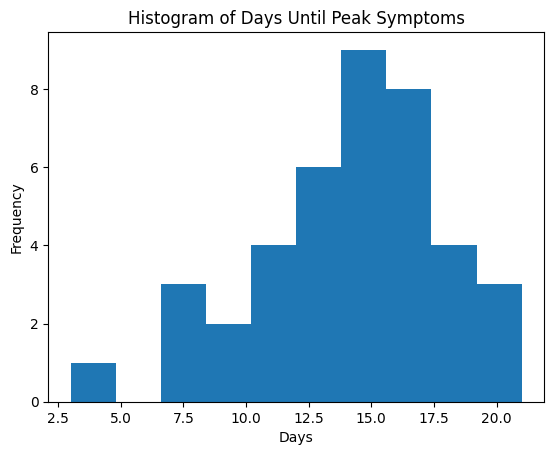

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data
data = np.array([
    16,12,14,16,13,9,15,7,20,19,11,14,9,13,11,3,8,21,16,16,
    12,16,14,20,7,14,18,14,18,13,11,16,18,16,11,13,14,
    16,15,15
])

# Sample size
n = len(data)

# Sample mean
xbar = np.mean(data)

# Known population standard deviation
sigma = 4
z = 1.96  # 95% confidence level

# Confidence interval
margin = z * sigma / np.sqrt(n)
ci_lower = xbar - margin
ci_upper = xbar + margin

# Output results
print(f"Sample mean: {xbar:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")
 
# Histogram
plt.hist(data, bins=10)
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Histogram of Days Until Peak Symptoms")
""" Histogram: approximately normal"""


The value 17 days lies well outside the 95% confidence interval **(12.61,15.09)**
This suggests that **μ=17** is not consistent with the observed data at the 95% confidence level

### Exercise 3

Sulfur dioxide causes acid rain. These data were obtained on the concentration in a forest area thought to have been damaged by acid rain:
|µg/m³|52.7|43.9|41.7|71.5|47.6|55.1|62.2|56.5|33.4|61.8|54.3|50.0|45.3|63.4|53.9|65.5|66.6|70.0|52.4|38.6|46.1|44.4|60.7|56.4|
|-----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|

a) Compute $\bar{x}$, $s^2$ and $s$, the sample mean, sample variance and sample deviation.

b) Compute a 95% confidence interval on the mean. 

c) Given a national average of 20 µg/m³, is there evidence for elevated sulfur levels in the data?

In [15]:
import numpy as np
from scipy.stats import t

# ---- Data----
x = np.array([
    52.7, 43.9, 41.7, 71.5, 47.6, 55.1, 62.2, 56.5,
    33.4, 61.8, 54.3, 50.0, 45.3, 63.4, 53.9, 65.5,
    66.6, 70.0, 52.4, 38.6, 46.1, 44.4, 60.7, 56.4
])

n = len(x)

# (a) Sample mean, sample variance (unbiased, ddof=1), sample std
xbar = np.mean(x)
s2 = np.var(x, ddof=1)      # sample variance
s = np.std(x, ddof=1)       # sample standard deviation

print(f"n = {n}")
print(f"(sample mean) = {xbar:.4f}")
print(f" (sample variance) = {s2:.4f}")
print(f"(sample std dev) = {s:.4f}")

# (b) 95% CI for the mean using t critical value
alpha = 0.05

tcrit = t.ppf(1 - alpha/2, df=n-1)
margin = tcrit * s / np.sqrt(n)

ci = (xbar - margin, xbar + margin)

print("95% CI (t-interval):")
print(f"t = {tcrit:.4f}")
print(f"CI = ({ci[0]:.4f}, {ci[1]:.4f})")

#c) 
""" The interval (49, 58) represents the likely average sulfur dioxide concentration in the area, 
which is much higher than the national average and therefore indicates elevated pollution."""


n = 24
(sample mean) = 53.9167
 (sample variance) = 101.4797
(sample std dev) = 10.0737
95% CI (t-interval):
t = 2.0687
CI = (49.6629, 58.1704)


' The interval (49, 58) represents the likely average sulfur dioxide concentration in the area, \nwhich is much higher than the national average and therefore indicates elevated pollution.'